### Visualización de datos geoespaciales con Python

Guillermo Martínez Flores

Script original proporcionado por Milagro Urricariet

#### Librerías

- **Matplotlib**: grafica en coordenadas cartesianas (x, y).  
- **Basemap**: fue la primera extensión de matplotlib para mapas, hoy está en desuso.  
- **Cartopy**: la librería actual recomendada; integra directamente con matplotlib y soporta múltiples proyecciones.  

#### Datos

Datos de temperatura superficial del mar (NetCDF), para un día en particular.

Fuente: https://data.remss.com/SST/daily/mw_ir/v05.1/netcdf/.

Archivo: `20251004120000-REMSS-L4_GHRSST-SSTfnd-MW_IR_OI-GLOB-v02.0-fv05.1.nc`


#### Instalación

Para instalar las librerías con `conda` puedes utilizar el siguiente comando y el archivo ``environment.yml``.

 ```bash
conda env create -f environment.yml -n geospatial
 ```

#### Notebook

Este notebook se basa en el spript compartido por xxx para introducir el uso de **Python** para visualizar datos espaciales, con énfasis en las librerías mencionadas arriba. 

Secciones del notebook:
1. Importar librerías
2. Abrir el archivo NetCDF seleccionando la variable y región de interés
3. Cómo visualizar datos geoespaciales a través de mapas con distintas proyecciones.
4. Elementos y herramientas del gráfico (línea de costa, barras de colores y rangos, cuadrícula en los ejes).
5. Diferentes formas de visualizar nuestros datos (`pcolormesh`, `contourf` y `contour`).

El notebook está pensado como una herramienta práctica para aprender y luego consultar cuando lo necesiten.

#### 1. Importar librerías

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean
import numpy as np

### 2. Abrir el archivo NetCDF, seleccionando la variable y región de interés


In [7]:
path = 'data/20251004120000-REMSS-L4_GHRSST-SSTfnd-MW_IR_OI-GLOB-v02.0-fv05.1.nc'
ds = xr.open_dataset(path)
# Seleccionamos la variable `analysed_sst` y la región de interés (20-32°N y -117-105°W)
sst_data = ds.analysed_sst.sel(lat=slice(20,32), lon = slice(-117, -105))
# Seleccionamos el primer tiempo del dataset para obtener una variable espacial 2D
sst = sst_data.isel(time=0) - 273  # Convertimos de Kelvin a Celsius

#### 4. Visualización básica (Matplotlib)

Usamos `pcolormesh` para una visualización rápida de los datos

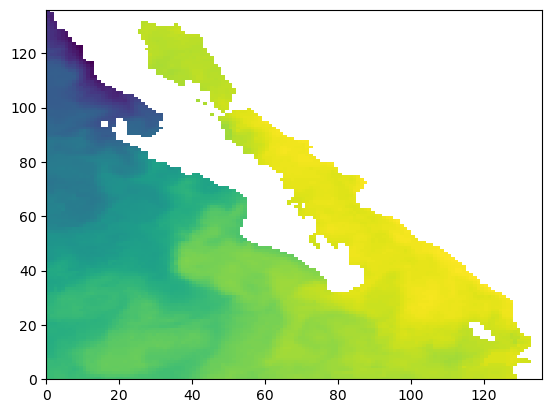

In [10]:
plt.pcolormesh(sst)

#### 5. Visualización básica (Matplotlib), con algunos elementos del mapa

In [11]:
plt.figure(figsize=(8,5))
plt.pcolormesh(lon, lat, sst, cmap=cmocean.cm.thermal) 
plt.colorbar(label="SST (°C)")
plt.title(f"Temperatura de la Superficie del Mar (NW México) {format(str(sst.time.values)[:10])})
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.show()

SyntaxError: unterminated f-string literal (detected at line 4) (1441254554.py, line 4)

## 5. Visualización básica con Cartopy

Graficaremos el campo de temperatura en una proyección **PlateCarree** (la más simple) y agregaremos las líneas de costa.

Nota: `transform=ccrs.PlateCarree()` indica que las coordenadas de los datos están en lat/lon. Esto es importante para que Cartopy proyecte correctamente los datos sobre la proyección del mapa.

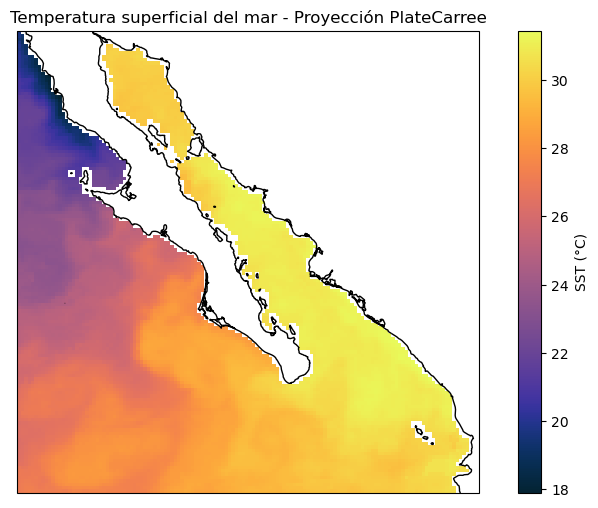

In [8]:
fig = plt.figure(figsize=(10,6))
ax = plt.axes(projection=ccrs.PlateCarree()) 
sst.plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), cmap=cmocean.cm.thermal,
                    cbar_kwargs={'label': 'SST (°C)'})
ax.coastlines()
ax.set_title("Temperatura superficial del mar - Proyección PlateCarree")
plt.show()

## Ejemplo con otra proyección y agregado de herramientas Cartopy

La **proyección Miller** es similar a Mercator, pero corrige ligeramente la distorsión en latitudes altas. Útil para mapas globales.

Además, definimos los límites mínimo y máximo del plot para una mejor visualización.

Y agregaremos más herramientas de cartopy: con `add_feature()` y `ax.set_extent()`

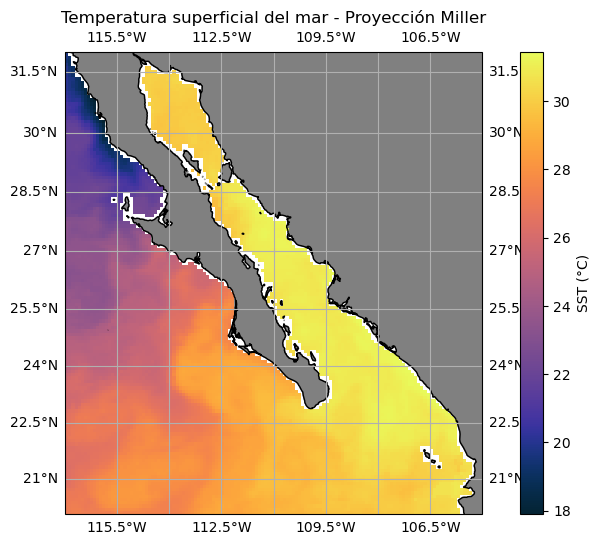

In [9]:
fig = plt.figure(figsize=(10,6))
ax = plt.axes(projection=ccrs.Mercator()) # Defino la proyección del mapa
sst.plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), cmap=cmocean.cm.thermal,   # Uso la transformación PlateCaree porque tengo los datos en lat/lon
                    vmin = sst.min(), vmax = sst.max(), # Valores mínimo y máximo de la sst
                    cbar_kwargs={'label': 'SST (°C)'})
ax.coastlines()
ax.gridlines(draw_labels=True)
ax.add_feature(cfeature.LAND, color = 'grey')
ax.set_title("Temperatura superficial del mar - Proyección Miller")
plt.show()

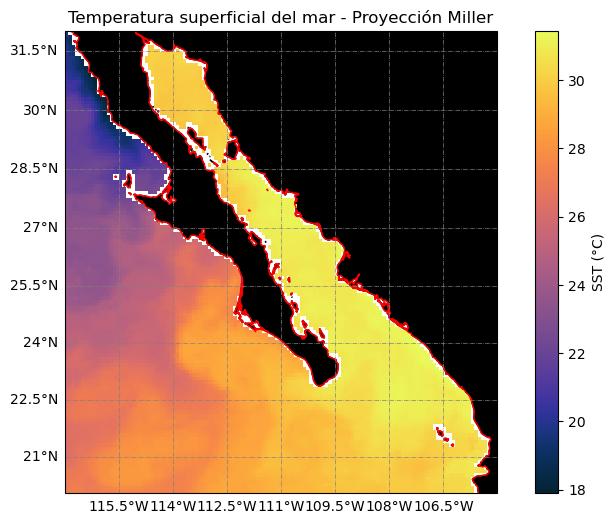

In [10]:
#lon_min = -82
#lon_max = -50
#lat_min = -60
#lat_max = -20

fig = plt.figure(figsize=(10,6))
ax = plt.axes(projection=ccrs.Miller()) # Defino la proyección del mapa
#ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())
sst.plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), cmap=cmocean.cm.thermal,   # Uso la transformación PlateCaree porque tengo los datos en lat/lon
                    vmin = sst.min(), vmax = sst.max(), # Valores mínimo y máximo de la sst
                    cbar_kwargs={'label': 'SST (°C)'})
ax.coastlines(color = 'red')
ax.add_feature(cfeature.LAND, color = 'black')

# Gridlines
gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='grey', linestyle='-.')
gl.top_labels = False 
gl.right_labels = False


ax.set_title("Temperatura superficial del mar - Proyección Miller")
plt.show()

## 6. Diferencias entre `pcolormesh`, `contour` y `contourf`

- **pcolormesh**: colorea cada celda con el valor correspondiente (ideal para datos de grilla).
- **contour**: dibuja sólo las líneas de contorno (isolíneas), sin color de relleno.
- **contourf**: crea polígonos coloreados interpolando entre valores (útil para visualizar gradientes suaves).

In [16]:
levelsContour = np.linspace(sst.min().values, sst.max().values,10)
levelsContour

array([17.902313, 19.406546, 20.910776, 22.415009, 23.91924 , 25.423473,
       26.927704, 28.431936, 29.936169, 31.4404  ], dtype=float32)

Text(0.5, 1.0, 'pcolormesh')

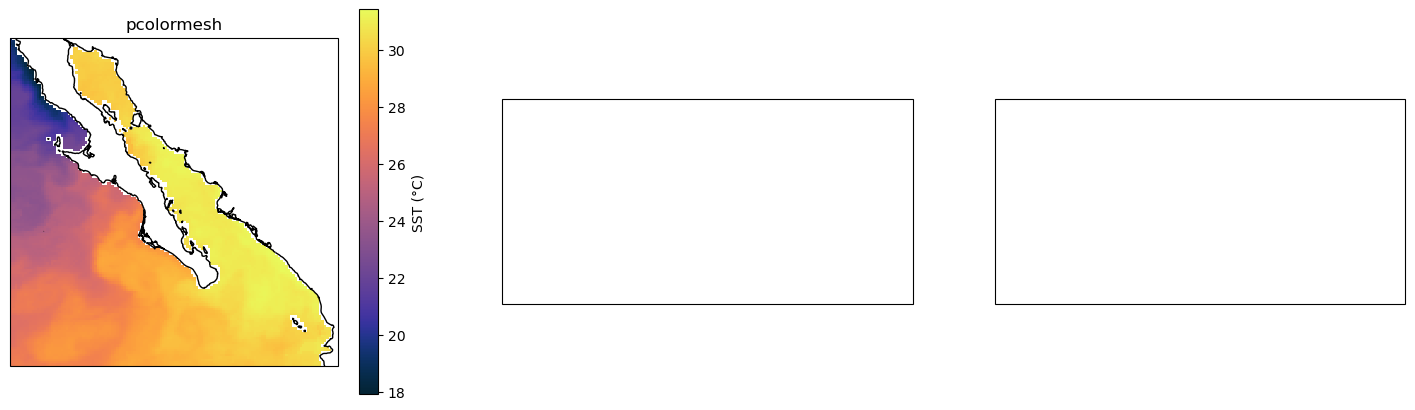

In [37]:
fig, axes = plt.subplots(1,3, figsize=(18,5), subplot_kw={'projection': ccrs.PlateCarree()})

# pcolormesh
sst.plot.pcolormesh(ax=axes[0], cmap=cmocean.cm.thermal, cbar_kwargs={'label': 'SST (°C)'})
axes[0].coastlines()
axes[0].set_title("pcolormesh")



In [ ]:
# contourf
sst.plot.contourf(ax=axes[1], cmap=cmocean.cm.thermal, levels=levelsContour, cbar_kwargs={'label': 'SST (°C)'})
axes[1].coastlines()
axes[1].set_title("contourf")

# contour
sst.plot.contour(ax=axes[2], levels=levelsContour, colors='black')
axes[2].coastlines()
axes[2].set_title("contour")

plt.show()

## Figura Final Mejorada

Ejemplo de mapa con estética más cuidada y uso de herramientas de Cartopy.

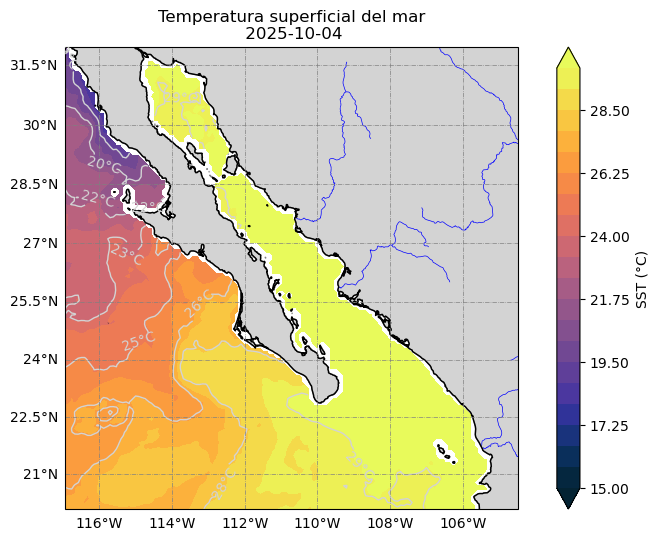

In [19]:
fig = plt.figure(figsize=(10,6))
ax = plt.subplot(111, projection=ccrs.Miller())
#ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

# Título
ax.set_title("Temperatura superficial del mar\n 2025-10-04")

# Definir niveles para contourf
levels_contourf = np.linspace(15, 30, 21)  # 21 niveles y van de 0ªC a 20 ªC

# Contourf para colores
cf = ax.contourf(lon, lat, sst, levels=levels_contourf, transform=ccrs.PlateCarree(),
                 cmap=cmocean.cm.thermal, extend='both')

# Contour para isotermas específicas
iso = ax.contour(lon, lat, sst, levels=levelsContour, colors='lightgray', linewidths=1, transform=ccrs.PlateCarree())
ax.clabel(iso, fmt='%d°C', inline=True, fontsize=10)  # etiquetas en las isotermas

# Tierra con cfeature.LAND
ax.add_feature(cfeature.LAND, facecolor='lightgray', edgecolor='grey')
#ax.add_feature(cfeature.LAKES, facecolor='lightblue', edgecolor='blue')
#ax.add_feature(cfeature.RIVERS, edgecolor='blue')

# Capa de ríos de Natural Earth (resolución 10m)
rivers_ne = cfeature.NaturalEarthFeature(
    category='physical',
    name='rivers_lake_centerlines',
    scale='10m',
    facecolor='none',
    edgecolor='blue'
)
ax.add_feature(rivers_ne, linewidth=0.5)

ax.coastlines(color='black')


# Gridlines
gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='grey', linestyle='-.')
gl.top_labels = False
gl.right_labels = False

# Barra de colores
cb = plt.colorbar(cf, extend="both", orientation='vertical')
cb.set_label("SST (°C)")

plt.show()

## Ejercicios

- Cambiar la zona de interés usando `ax.set_extent()`
- Cambiar la proyección de la figura
- Añadir fronteras y ríos usando `ax.add_feature`()